In [3]:
import os
import json
from visual_genome import api
from tqdm import tqdm
from PIL import Image


In [4]:
with open('/home/duypd/ThisPC-DuyPC/SG-Retrieval/Datasets/VisualGenome/anno_org/attributes.json') as f:
    attribute_json = json.load(f)

In [3]:
with open('/home/duypd/ThisPC-DuyPC/SG-Retrieval/Datasets/VisualGenome/anno_org/objects.json') as f:
    objects_json = json.load(f)

In [4]:
with open('/home/duypd/ThisPC-DuyPC/SG-Retrieval/Datasets/VisualGenome/anno_org/image_data.json') as f:
    image_json = json.load(f)

In [7]:
#Information
print(type(attribute_json))
print(len(attribute_json))
print(attribute_json[0].keys())
attribute_json[0]

<class 'list'>
108077
dict_keys(['image_id', 'attributes'])


{'image_id': 1,
 'attributes': [{'synsets': ['clock.n.01'],
   'h': 339,
   'object_id': 1058498,
   'names': ['clock'],
   'w': 79,
   'attributes': ['green', 'tall'],
   'y': 91,
   'x': 421},
  {'synsets': ['street.n.01'],
   'h': 262,
   'object_id': 5046,
   'names': ['street'],
   'w': 714,
   'attributes': ['sidewalk'],
   'y': 328,
   'x': 77},
  {'synsets': ['shade.n.01'],
   'h': 192,
   'object_id': 5045,
   'names': ['shade'],
   'w': 274,
   'y': 338,
   'x': 119},
  {'synsets': ['man.n.01'],
   'h': 262,
   'object_id': 1058529,
   'names': ['man'],
   'w': 60,
   'y': 249,
   'x': 238},
  {'synsets': ['gym_shoe.n.01'],
   'h': 26,
   'object_id': 5048,
   'names': ['sneakers'],
   'w': 52,
   'attributes': ['grey'],
   'y': 489,
   'x': 243},
  {'synsets': ['headlight.n.01'],
   'h': 15,
   'object_id': 5050,
   'names': ['headlight'],
   'w': 23,
   'attributes': ['off'],
   'y': 366,
   'x': 514},
  {'synsets': ['car.n.01'],
   'h': 98,
   'object_id': 5049,
   'names'

In [6]:
#Information
print(type(objects_json))
print(len(objects_json))
print(objects_json[0].keys())
objects_json[0]

NameError: name 'objects_json' is not defined

In [4]:
def create_description(attributes, names):
    if len(attributes) > 1:
        attributes_str = ' , '.join(attributes)
    else:
        attributes_str = attributes[0] if attributes else ""
    
    if attributes_str:
        description = f"{attributes_str} {names[0]}"
    else:
        description = names[0]
    
    return description

def get_image_data(image_id, image_data):
    for x in image_data:
        if(x['image_id'] == image_id):
            item = {
                'width': x['width'],
                'height': x['height'],
                'id': x['image_id'],
                'file_name': str(x['image_id'])+'.jpg'
            }
            return item



In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
def plot_bounding_box(image_path, bboxes, labels, figsize=(10, 10)):
    """
    image_path: Đường dẫn tới ảnh gốc
    bboxes: Danh sách các bounding box, mỗi bounding box là [x, y, width, height]
    labels: Danh sách các title/label cho mỗi bounding box
    """
    # Mở hình ảnh
    image = Image.open(image_path)

    # Tạo một plot figure
    fig, ax = plt.subplots(1, figsize=figsize)

    # Hiển thị hình ảnh
    ax.imshow(image)

    # Vẽ từng bounding box cùng với title
    for bbox, label in zip(bboxes, labels):
        x, y, width, height = bbox  # Bounding box [x, y, width, height]
        
        # Vẽ bounding box (hình chữ nhật)
        rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Thêm title/label cho bounding box
        ax.text(x, y, label, color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

    # Hiển thị kết quả
    plt.axis('off')  # Tắt các trục
    plt.show()

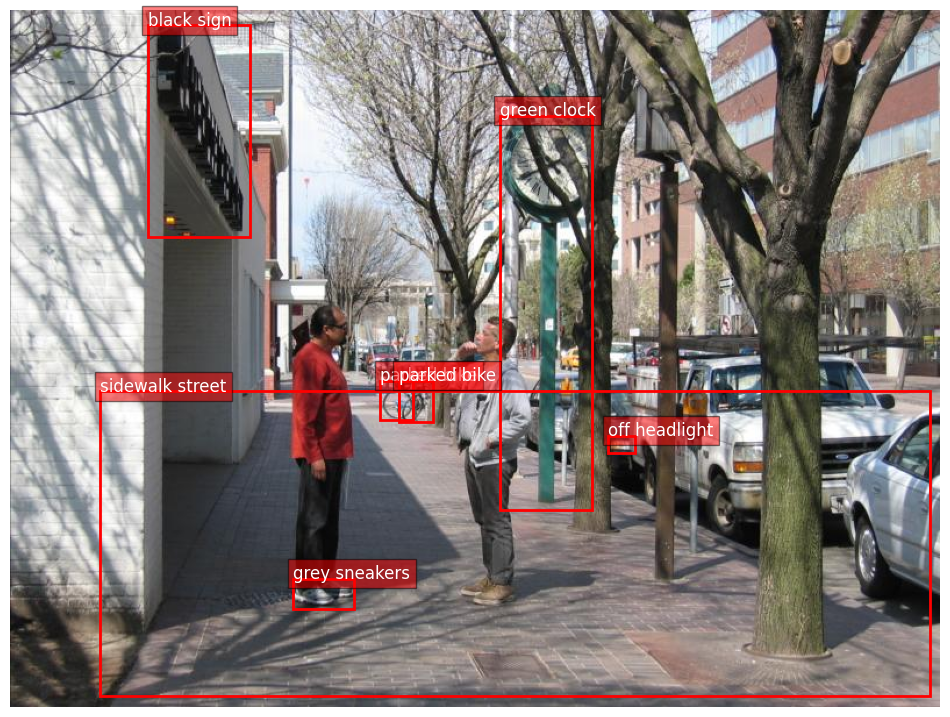

In [14]:
image_path = '/home/duypd/ThisPC-DuyPC/SG-Retrieval/Datasets/VisualGenome/VG_100K/' + str(attribute_json[0]['image_id']) + '.jpg'
bbox = []
title = []
for item in attribute_json[0]['attributes'][:10]:
    if('attributes' in item.keys()):
        box = [item['x'], item['y'], item['w'], item['h']]
        bbox.append(box)
        att_anno = item['attributes'][0]
        name_anno = item['names'][0]
        title.append( att_anno + ' ' + name_anno )
        
plot_bounding_box(image_path, bbox, title, figsize=(12, 12))

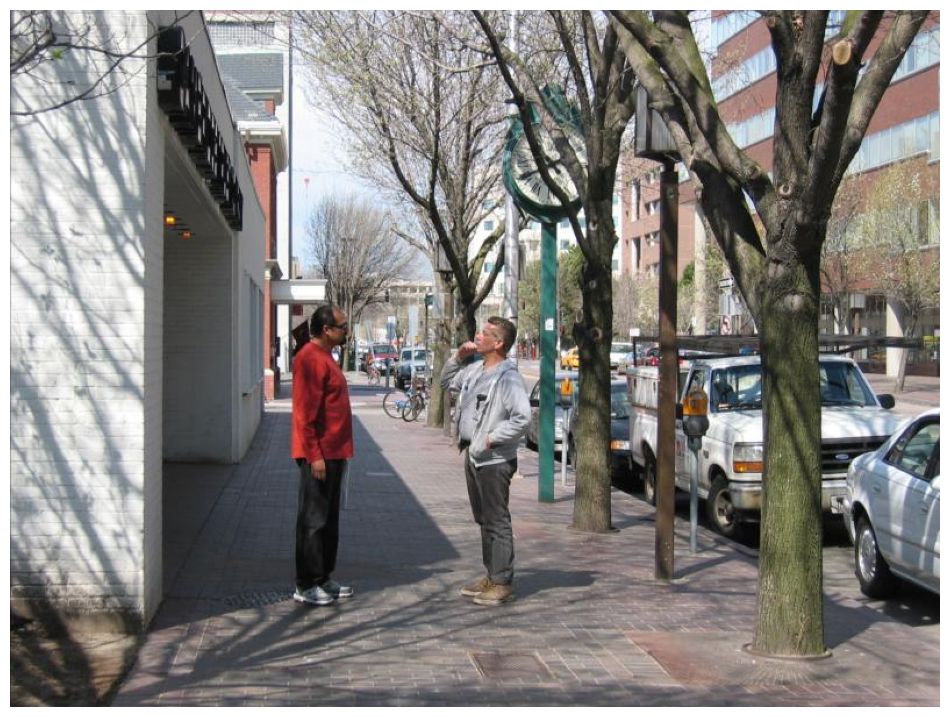

In [16]:
image = Image.open(image_path)

# Tạo một plot figure
fig, ax = plt.subplots(1, figsize=(12,12))
ax.imshow(image)
plt.axis('off')
plt.show()

In [7]:
save_dir = '/home/duypd/ThisPC-DuyPC/SG-Retrieval/Datasets/VisualGenome/VG_100K_cropped/'
path_to_images = '/home/duypd/ThisPC-DuyPC/SG-Retrieval/Datasets/VisualGenome/VG_100K/'
counter = 1
min_size = 50 
images = []
annotations = []

#extract to 25.000 images from VG_100K
for item in tqdm(attribute_json[:25000]):
    image_id = item['image_id']
    attribute = item['attributes']
    image_path = f'{path_to_images}/{image_id}.jpg'
    if not os.path.exists(image_path):
        continue
    image = Image.open(image_path)
    for att in attribute:
        if('attributes' in att.keys()):
            x = att['x']
            y = att['y']
            width = att['w']
            height = att['h']

            if width < min_size or height < min_size:
                continue

            cropped_image = image.crop((x, y, x + width, y + height))
            cropped_width, cropped_height = cropped_image.size

            cropped_image_path = f'{save_dir}/{counter}.jpg'
            cropped_image.save(cropped_image_path)
            att_anno = att['attributes'][0]
            name_anno = att['names'][0]
            im = {
                "file_name": f'{counter}.jpg',
                "height": cropped_height,
                "width": cropped_width,
                "id": counter
            }
            anno = {
                "image_id": counter,
                "id": counter,
                "caption": f'This is {att_anno} {name_anno}.'
            }

            images.append(im)
            annotations.append(anno)

            counter += 1
    if(counter == 25000):
        break

vg_anno = {
    "images": images,
    "annotations": annotations
}
with open('caption.json', 'w') as f:
    json.dump(vg_anno, f)

100%|██████████| 25000/25000 [01:39<00:00, 250.46it/s]


In [8]:
import random

with open('caption.json', 'r') as f:
    data = json.load(f)

images = data['images']
annotations = data['annotations']

train_ratio = 0.8


random.seed(42)
random.shuffle(images)

split_index = int(len(images) * train_ratio)
train_images = images[:split_index]
val_images = images[split_index:]

train_image_ids = {img['id'] for img in train_images}
val_image_ids = {img['id'] for img in val_images}

train_annotations = [anno for anno in annotations if anno['image_id'] in train_image_ids]
val_annotations = [anno for anno in annotations if anno['image_id'] in val_image_ids]

captions_train = {
    "images": train_images,
    "annotations": train_annotations
}

captions_val = {
    "images": val_images,
    "annotations": val_annotations
}

with open('captions_train.json', 'w') as f_train:
    json.dump(captions_train, f_train)

with open('captions_val.json', 'w') as f_val:
    json.dump(captions_val, f_val)

print("Tệp captions_train.json và captions_val.json đã được tạo thành công!")

Tệp captions_train.json và captions_val.json đã được tạo thành công!


In [67]:
images = []
annotations = []

id_counter = 1

for item in attribute_json[26000:29000]:
    image_id = item['image_id']
    images.append(get_image_data(image_id, image_json))
    ck = 0
    for idx, i in enumerate(item['attributes']):
        if('attributes' in i.keys()):
            anno = {
                "id": id_counter,
                "image_id": image_id,
                "segmentation": None,
                "area": i['w'] * i['h'],
                "bbox": [i['x'], i['y'], i['w'], i['h']],
                "iscrowd": 0,
                "attribute": i['attributes'],
                "name": i['names'],
                # "desc": create_description(i['attributes'], i['names']) 
                "desc": i['attributes'][0] + ' ' + i['names'][0]
                
            }
            id_counter += 1
            ck += 1
            annotations.append(anno)
        if(ck == 5):
            break
    # break 

vg_anno = {
    "images": images,
    "annotations": annotations
}
with open('val_desc.json', 'w') as f:
    json.dump(vg_anno, f)